This Jupyter notebook documents the work completed in order to create a multivariate linear regression for the module 1 final project. It includes importing the data from kc_house_data.csv and cleaning the data. Cleaning will include identifying and possibly changing data types, removing all duplicates, and searching for and replacing all NAN values. Next, relationships between each variable and the price of each homes sold will be analyzed and possibly visualized. Finally, a multivariate linear regression will be created using select predictors, and the regression will be validated using train-test-split and cross validation. 

****
The first section of this project is to import the data set and all libraries that will be needed to complete the data cleaning and interpretation. 
****

In [1]:
# import all necessary libaries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
# importing data and displaying first 5 rows

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# Check data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# need to change date object data type to a datetime data type

df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

In [5]:
# sqft_basement is an object - must contain a placeholder value
# contains a placeholder, '?'
# replacing '?' with (sqft_living minus sqft_above) then converting all values to float

df['sqft_basement'].unique()
x = df['sqft_basement'] == '?'
df.loc[x, 'sqft_basement'] = df.loc[x, 'sqft_living'] - df.loc[x, 'sqft_above']
df['sqft_basement'] = df['sqft_basement'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

In [6]:
# checking for duplicate values based on id and only keeping the first mention

df = df.drop_duplicates(subset='id', keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null datetime64[ns]
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.6

Text(0.5, 0, 'Price of Home')

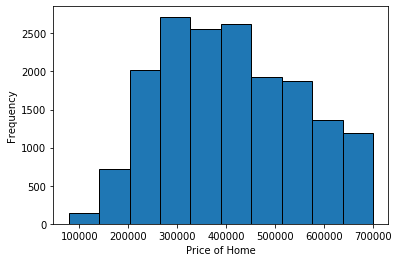

In [7]:
# checking for normal distribution of data
# cutting down dataframe to prices under 700,000 for close to normal distribution

df = df.loc[(df['price'] <= 700000)]
df['price'].plot.hist(edgecolor='black')
plt.xlabel('Price of Home')

In [8]:
# checking for NAN values - need to decide what to do with each

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1889
view               51
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3053
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# handling waterfront nan

print(df['waterfront'].value_counts())

# almost 100% of waterfront values are 0, so going to replace all waterfront NAN with zero

df['waterfront'] = df['waterfront'].fillna(value = 0)
df.isna().sum()

# will need to proceed with caution if waterfront is used for regression

0.0    15206
1.0       28
Name: waterfront, dtype: int64


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               51
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3053
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
# handling view NAN
# going to replace NAN view values with mean of view

df['view'].value_counts()
df['view'] = df['view'].fillna(df['view'].mean())
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3053
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
# have nan values in yr_renovated
# changing nan to 0 and creating new column, yrs_since_renovation

df['yr_renovated'] = df['yr_renovated'].fillna(0)
y = df['yr_renovated'] == 0
df.loc[y, 'yrs_since_renovation'] = 2015 - df.loc[y, 'yr_built']
z = df['yr_renovated'] != 0
df.loc[z, 'yrs_since_renovation'] = 2015 - df.loc[z, 'yr_renovated']

In [12]:
# check for any placeholder values (min/max values that don't make sense)
# looks like there is one placeholder value (or major outlier) of 33 bedrooms, going to drop that row

df.describe()
df.drop(df.index[df['bedrooms'] == 33], inplace = True)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yrs_since_renovation
count,1.712200e+04,17122.000000,17122.000000,17122.000000,17122.000000,1.712200e+04,17122.000000,17122.000000,17122.000000,17122.000000,...,17122.000000,17122.000000,17122.000000,17122.000000,17122.000000,17122.000000,17122.000000,17122.000000,17122.000000,17122.000000
mean,4.614854e+09,409273.608574,3.244364,1.956708,1815.242904,1.339702e+04,1.435814,0.001635,0.117802,3.399486,...,1573.920336,241.322567,1970.482070,49.821633,98079.357552,47.545336,-122.216268,1805.952692,11789.257680,43.152611
std,2.858583e+09,139880.127217,0.863352,0.668374,652.021869,3.580784e+04,0.535736,0.040407,0.519696,0.640673,...,610.607798,379.019720,28.482936,311.175657,53.790044,0.147010,0.142910,512.272202,24615.187701,28.149455
min,1.000102e+06,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.172000e+09,299000.000000,3.000000,1.500000,1330.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,...,1130.000000,0.000000,1952.000000,0.000000,98033.000000,47.435300,-122.331000,1430.000000,5026.000000,19.000000
50%,3.936900e+09,399950.000000,3.000000,2.000000,1730.000000,7.434000e+03,1.000000,0.000000,0.000000,3.000000,...,1420.000000,0.000000,1973.000000,0.000000,98065.000000,47.549100,-122.247000,1720.000000,7500.000000,40.000000
75%,7.327500e+09,518875.000000,4.000000,2.500000,2220.000000,1.000000e+04,2.000000,0.000000,0.000000,4.000000,...,1899.750000,460.000000,1994.000000,0.000000,98118.000000,47.681075,-122.129000,2120.000000,9624.750000,62.000000
max,9.900000e+09,700000.000000,11.000000,7.500000,5461.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,5450.000000,2196.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4410.000000,438213.000000,115.000000


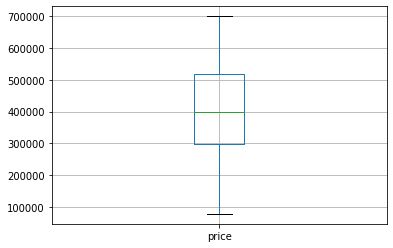

In [13]:
# boxplot in order to check for outliers and shape of distribution

df.boxplot('price')

****
Next, the relatonship between the individual predictors and the price of home sold will be explored. This section will include the posed questions. 
****

bedrooms
1      189
2     2576
3     8549
4     4713
5      914
6      150
7       18
8        7
9        3
10       2
11       1
Name: price, dtype: int64
bedrooms
1    311275.312169
2    369114.026398
3    396266.400866
4    446159.325907
5    461148.266958
6    468239.493333
7    477230.944444
8    512571.428571
Name: price, dtype: float64
bedrooms
1     189
2    2576
3    8549
4    4713
5     914
6     150
7      18
8       7
Name: price, dtype: int64


Text(0.5, 1.0, 'Average Price of Home Based on Bedrooms')

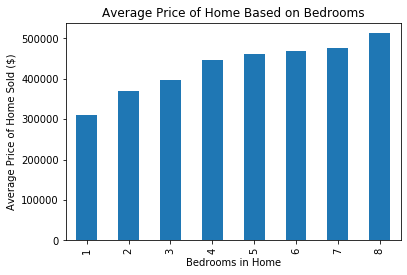

In [84]:
# grouping price by number of bedrooms
# this is interesting because the mean price of the homes drops when there are 11 bedrooms
# there are <5 homes with 9, 10 or 11 bedrooms (each) - going to drop those row
# will run ols regression model with and without bedroom drops

print(df.groupby(['bedrooms'])['price'].count())

dbr = df.copy()
dbr = dbr.loc[df['bedrooms'] < 9,:]
            
print(dbr.groupby(['bedrooms'])['price'].mean())
print(dbr.groupby(['bedrooms'])['price'].count())

ax = dbr.groupby(['bedrooms'])['price'].mean().plot(kind = 'bar')
ax.set_xlabel("Bedrooms in Home")
ax.set_ylabel("Average Price of Home Sold ($)")
ax.set_title("Average Price of Home Based on Bedrooms")

Text(0, 0.5, 'Average Price of Home Sold ($)')

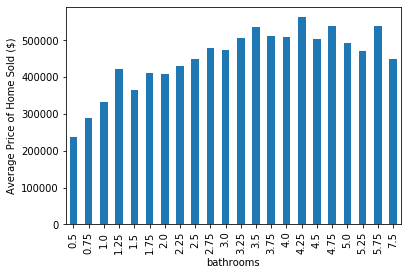

In [59]:
# grouping price by number of bathrooms

dr = df.copy()
ax = dr.groupby(['bathrooms'])['price'].mean().plot(kind = 'bar')
ax.set_ylabel("Average Price of Home Sold ($)")

Text(0.5, 1.0, 'Average Price of Home Based on Grade')

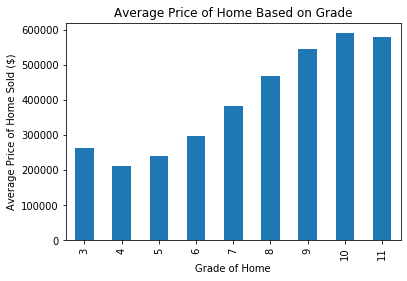

In [60]:
# grouping price by grade of home

dg = df.copy()
ax = dg.groupby(['grade'])['price'].mean().plot(kind = 'bar')
ax.set_xlabel("Grade of Home")
ax.set_ylabel("Average Price of Home Sold ($)")
ax.set_title("Average Price of Home Based on Grade")

Text(0.5, 1.0, 'Top 20 Zipcodes for Home Sales')

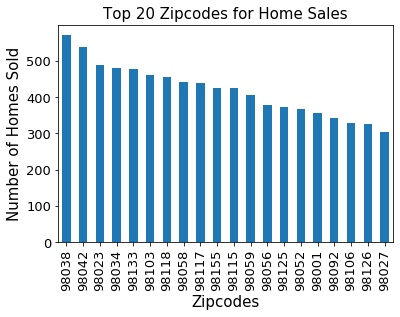

In [109]:
# What are the zipcodes for highest number of home sales?
# plotting number of homes sold by zipcode

dz = df.copy()
dztop20 = dz['zipcode'].value_counts().head(20)
ax = dztop20.plot(kind = 'bar', x = 'zipcode', y = dz['zipcode'].value_counts())
ax.set_xlabel("Zipcodes", fontsize=15)
ax.tick_params(axis="x", labelsize=13)
ax.set_ylabel("Number of Homes Sold", fontsize=15)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Top 20 Zipcodes for Home Sales", fontsize=15)

Text(0.5, 1.0, 'Top 20 Zipcodes for Home Sale Prices')

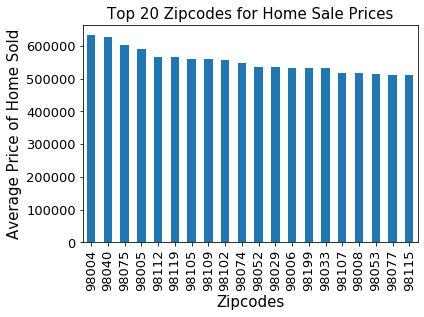

In [108]:
# What are the zipcodes for highest average price of home?
# plotting mean price of homes by zipcode

dz = df.copy()
ax = dz.groupby(['zipcode'])['price'].mean().sort_values(ascending = False).head(20).plot(kind = 'bar')
ax.set_xlabel("Zipcodes", fontsize = 15)
ax.tick_params(axis="x", labelsize=13)
ax.set_ylabel("Average Price of Home Sold", fontsize = 15)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Top 20 Zipcodes for Home Sale Prices", fontsize = 15)

Text(0.5, 1.0, 'Top 20 Zipcodes for Home Sale Prices')

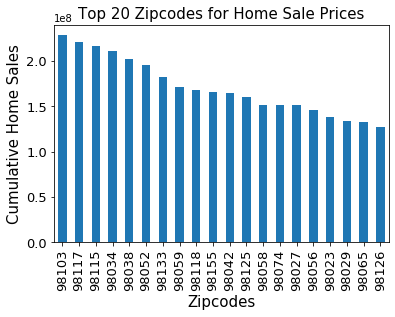

In [110]:
# What are the zipcodes for highest cumulative sales of homes?
# plotting cumulative sales prices by zipcode

ds = df.copy()
ax = ds.groupby(['zipcode'])['price'].sum().sort_values(ascending = False).head(20).plot(kind = 'bar')
ax.set_xlabel("Zipcodes", fontsize = 15)
ax.tick_params(axis="x", labelsize=13)
ax.set_ylabel("Cumulative Home Sales", fontsize = 15)
ax.tick_params(axis="y", labelsize=13)
ax.set_title("Top 20 Zipcodes for Home Sale Prices", fontsize = 15)

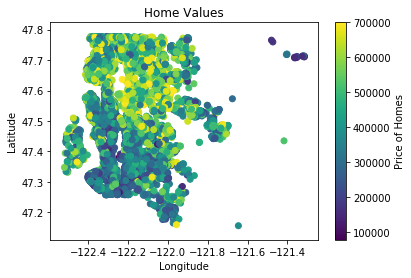

<Figure size 432x288 with 0 Axes>

In [104]:
# where in king county are the houses being sold, and at what price?
# plotting a density color bar map showing home prices by lat and long coordinates
# the northwest corner of the county contains the highest selling homes

dl = df.copy()
plt.scatter(x = dl['long'], y = dl['lat'], c = dl['price'])

cbar = plt.colorbar()
cbar.set_label('Price of Homes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Home Values')
fig = plt.figure()
plt.show()

fig.savefig('plot.jpeg')

****
Finally, variables will be chosen as predictors and used to create a multivariate linear regression using statsmodels and validated using sklearn.
****

In [65]:
# calculating and displaying each columns p values. The threshold of acceptance is 0.01.

outcome = 'price'
predictors = df.drop(['price','date', 'id'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(predictors, df['price'], verbose=True)
print('resulting features:')
print(result)

Add  lat                            with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 9.57092e-212
Add  sqft_living15                  with p-value 1.70712e-88
Add  view                           with p-value 3.43692e-71
Add  floors                         with p-value 1.06525e-65
Add  condition                      with p-value 4.06184e-80
Add  bathrooms                      with p-value 1.44987e-35
Add  sqft_lot                       with p-value 6.96137e-35
Add  bedrooms                       with p-value 1.21169e-17
Add  zipcode                        with p-value 7.09467e-14
Add  waterfront                     with p-value 6.01733e-10
Add  sqft_basement                  with p-value 0.0029099
Add  sqft_above                     with p-value 3.07087e-24
Add  long                           with p-value 0.000721294
resulting features:
['lat', 'sqft_living', 'grade

In [66]:
# calculating correlation of each variable to price

corr = df.corr()
corr = corr.stack().reset_index()
corr = corr.rename(columns = {'level_0':'Attribute_1', 'level_1':'Attribute_2', 0:'Correlation_Coefficient'})
corr = corr.loc[corr['Attribute_1'] == 'price']
corr.sort_values(by = 'Correlation_Coefficient', ascending = False)

,Attribute_1,Attribute_2,Correlation_Coefficient
22,price,price,1.000000
31,price,grade,0.502805
37,price,lat,0.478112
25,price,sqft_living,0.471839
39,price,sqft_living15,0.430498
32,price,sqft_above,0.373772
24,price,bathrooms,0.362673
27,price,floors,0.229116
23,price,bedrooms,0.218446
33,price,sqft_basement,0.209544


In [67]:
# displaying correlation values that are above a threshold of 0.8 
# helps determine which columns are too closely related to use together

corr = df.corr()
corr = corr.stack().reset_index()
corr = corr.rename(columns = {'level_0':'Attribute_1', 'level_1':'Attribute_2', 0:'Correlation_Coefficient'})
corr = corr.loc[corr['Attribute_1'] != corr['Attribute_2']]
corr.loc[corr['Correlation_Coefficient'].abs() > 0.75].sort_values(by = 'Correlation_Coefficient')

,Attribute_1,Attribute_2,Correlation_Coefficient
293,yr_built,yrs_since_renovation,-0.946429
433,yrs_since_renovation,yr_built,-0.946429
95,sqft_living,sqft_above,0.821740
235,sqft_above,sqft_living,0.821740


In [115]:
# calculating OLS regression results thru statsmodels

X = df[['bedrooms', 'sqft_living', 'grade', 'sqft_living15', 'lat', 'floors', 'bathrooms']]
X = sm.add_constant(X)
y = df['price']

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     3134.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:08:13   Log-Likelihood:            -2.2010e+05
No. Observations:               17122   AIC:                         4.402e+05
Df Residuals:                   17114   BIC:                         4.403e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.324e+07   2.31e+05   -100.623      0.000   -2.37e+07   -2.28e+07
bedrooms      -7487.8067   1069.821     -6.999      0.000   -9584.766   -5390.848
sqft_living      64.8643      2.043     31.747      0.000      60.859      68.869
grade          3.971e+04   1161.546     34.183      0.000    3.74e+04     4.2e+04
sqft_living15    34.7755      2.009     17.311      0.000      30.838      38.713
lat             4.88e+05   4861.891    100.369      0.000    4.78e+05    4.98e+05
floors         1011.9572   1593.156      0.635      0.525   -2110.791    4134.706
bathrooms      2186.3296   1647.923      1.327      0.185   -1043.769    5416.428
==============================================================================
Omnibus:                      558.348   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.819
Skew:                           0.436   Prob(JB):                    3.46e-136
Kurtosis:                       3.340   Cond. No.                     8.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
# calculating OLS regression results thru statsmodels
# going to drop floors and bathrooms as they had the highest p values
# did not adjust r squared value

X = df[['bedrooms','sqft_living', 'grade', 'sqft_living15', 'lat']]
X = sm.add_constant(X)
y = df['price']

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     4386.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:08:16   Log-Likelihood:            -2.2010e+05
No. Observations:               17122   AIC:                         4.402e+05
Df Residuals:                   17116   BIC:                         4.403e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.324e+07   2.31e+05   -100.632      0.000   -2.37e+07   -2.28e+07
bedrooms      -7269.7921   1052.029     -6.910      0.000   -9331.878   -5207.706
sqft_living      65.9518      1.917     34.412      0.000      62.195      69.708
grade          4.044e+04   1077.270     37.540      0.000    3.83e+04    4.26e+04
sqft_living15    34.5903      2.004     17.259      0.000      30.662      38.519
lat            4.878e+05   4859.122    100.382      0.000    4.78e+05    4.97e+05
==============================================================================
Omnibus:                      547.973   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.069
Skew:                           0.431   Prob(JB):                    2.03e-133
Kurtosis:                       3.335   Cond. No.                     8.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
# calculating OLS regression results thru statsmodels
# going to put back in floors and bathrooms and dropping 9, 10 and 11 bedroom houses dropped
# bedroom coefficient is still negative

X = dbr[['bedrooms', 'sqft_living', 'grade', 'sqft_living15', 'lat', 'floors', 'bathrooms']]
X = sm.add_constant(X)
y = dbr['price']

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     3132.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:08:28   Log-Likelihood:            -2.2002e+05
No. Observations:               17116   AIC:                         4.401e+05
Df Residuals:                   17108   BIC:                         4.401e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.323e+07   2.31e+05   -100.567      0.000   -2.37e+07   -2.28e+07
bedrooms      -7938.4742   1079.404     -7.354      0.000   -1.01e+04   -5822.731
sqft_living      64.8956      2.043     31.760      0.000      60.890      68.901
grade          3.976e+04   1161.968     34.214      0.000    3.75e+04     4.2e+04
sqft_living15    34.8599      2.010     17.346      0.000      30.921      38.799
lat            4.877e+05   4862.003    100.317      0.000    4.78e+05    4.97e+05
floors          815.5078   1593.928      0.512      0.609   -2308.756    3939.771
bathrooms      2420.8763   1652.337      1.465      0.143    -817.874    5659.627
==============================================================================
Omnibus:                      559.599   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.541
Skew:                           0.436   Prob(JB):                    1.46e-136
Kurtosis:                       3.342   Cond. No.                     8.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
# calculating OLS regression results thru statsmodels
# going to drop bedrooms all together
# minimal change to r squared

X = df[['sqft_living', 'grade', 'sqft_living15', 'lat', 'floors', 'bathrooms']]
X = sm.add_constant(X)
y = df['price']

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     3637.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:41:54   Log-Likelihood:            -2.2013e+05
No. Observations:               17122   AIC:                         4.403e+05
Df Residuals:                   17115   BIC:                         4.403e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.33e+07   2.31e+05   -100.749      0.000   -2.37e+07   -2.28e+07
sqft_living      58.6326      1.842     31.839      0.000      55.023      62.242
grade          4.071e+04   1154.231     35.271      0.000    3.84e+04     4.3e+04
sqft_living15    35.7544      2.007     17.817      0.000      31.821      39.688
lat            4.886e+05   4867.815    100.380      0.000    4.79e+05    4.98e+05
floors         2063.6010   1588.277      1.299      0.194   -1049.584    5176.786
bathrooms       114.3218   1623.386      0.070      0.944   -3067.681    3296.324
==============================================================================
Omnibus:                      561.639   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              627.194
Skew:                           0.438   Prob(JB):                    6.41e-137
Kurtosis:                       3.335   Cond. No.                     8.72e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/stacyshingleton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


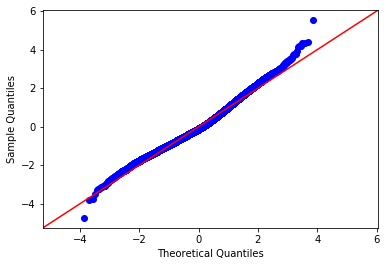

In [26]:
# Q-Q plot thru scipy

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [27]:
# calculating the train-test-split
# calculating mean square error from the train and test split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

linreg_sm = sm.OLS(y_train, X_train).fit()

y_hat_train = linreg_sm.predict(X_train)
y_hat_test = linreg_sm.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = (mean_squared_error(y_train, y_hat_train))
test_mse = (mean_squared_error(y_test, y_hat_test))

sci_not_train_mse = "{:.2e}".format(train_mse)
sci_not_test_mse = "{:.2e}".format(test_mse)

print('training data mean squared error:', sci_not_train_mse)
print('test data mean squared error:',sci_not_test_mse)

training data mean squared error: 8.67e+09
test data mean squared error: 8.19e+09


In [28]:
# k fold cross validation for mean squared error

linreg_skl = LinearRegression()

cv_5_results  = -1 * np.mean(cross_val_score(linreg_skl, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = -1 * np.mean(cross_val_score(linreg_skl, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = -1 * np.mean(cross_val_score(linreg_skl, X, y, cv=20, scoring='neg_mean_squared_error'))

cv_5_sci_not = "{:.2e}".format(cv_5_results)
cv_10_sci_not = "{:.2e}".format(cv_10_results)
cv_20_sci_not = "{:.2e}".format(cv_20_results)

print('k fold value of mean squared error, 5 partitions:', cv_5_sci_not)
print('k fold value of mean squared error, 10 partitions:', cv_10_sci_not)
print('k fold value of mean squared error, 20 partitions:', cv_20_sci_not)

k fold value of mean squared error, 5 partitions: 8.58e+09
k fold value of mean squared error, 10 partitions: 8.58e+09
k fold value of mean squared error, 20 partitions: 8.58e+09


In [29]:
# k fold cross validation for coefficient of determination

linreg_skl = LinearRegression()

cv_5_results  =np.mean(cross_val_score(linreg_skl, X, y, cv=5,  scoring='r2'))
cv_10_results =np.mean(cross_val_score(linreg_skl, X, y, cv=10, scoring='r2'))
cv_20_results =np.mean(cross_val_score(linreg_skl, X, y, cv=20, scoring='r2'))


print('k fold value of coefficient of determination, 5 partitions:', cv_5_results)
print('k fold value of coefficient of determination, 10 partitions:', cv_10_results)
print('k fold value of coefficient of determination, 20 partitions:', cv_20_results)



k fold value of coefficient of determination, 5 partitions: 0.5602396402230811
k fold value of coefficient of determination, 10 partitions: 0.5593601741492712
k fold value of coefficient of determination, 20 partitions: 0.5591504014217643


****
The R-squared value, the coefficient of determination, is 0.56 for this model. This means that 56% of the variations in home prices are explained by the independent variables,  'bedrooms', 'sqft_living', 'grade', 'sqft_living15', 'lat', 'floors', and 'bathrooms' in this model. Q-Q plots are used to model error residuals against a standard normal distribution. In the Q-Q plot seen below, it is seen that there are no major deviations from the normal distribution line, proving the earlier assumption of normality. 

In order to validate the multivariate linear regression model calculated with statsmodels, train-test-split and cross validation was employed. Train-test- split will split the data into two sections, one which will serve as the training data set, and the other serving as the testing data set. Each set will generate a mean squared error, and the difference between the two will summarize how well the predicted values compare to actual values. The train-test-split values calculated for this model had a negligible difference, suggesting the model is an appropriate fit. Train-test-split models will calculate a slightly different mean squared error each time the model is run due to the random split of train and test data. For this reason, K-fold cross validation is a better method used to validate the multivariate linear regression.  K-fold cross validation averages the individual results from multiple linear models which each use a different section of the test data set. K-fold, with 5, 10 and 20 partitions, was used to assess the mean squared error as well as the coefficient of determination for the model. The coefficient of determination came back exactly the same, while the mean squared error has very little difference.
****

In [30]:
# #kde graphs

# for column in df.iloc[:,2:]:
#     print(column)
#     df[column].plot.hist(density = True, label = column + ' histogram')
#     df[column].plot.kde(label = column + ' kde')
#     plt.legend()
#     plt.show()   


In [31]:
# df.head()
# df.plot(kind = 'scatter',x = 'sqft_above',y = 'price')

In [32]:
# # maybe add basement sqft to total sqft and have cat col basement 1 or 0
# df.head()
# df.plot(kind = 'scatter',x = 'sqft_basement',y = 'price')

In [33]:
# df.head()
# df.plot(kind = 'scatter',x = 'yr_built',y = 'price')

In [34]:
# df.head()
# df.plot(kind = 'scatter',x = 'sqft_living15',y = 'price')

In [35]:
# df.head()
# df.plot(kind = 'scatter',x = 'bathrooms',y = 'price')

In [36]:
# df.head()
# df.plot(kind = 'scatter',x = 'bedrooms',y = 'price')

In [37]:
# df.head()
# df.plot(kind = 'scatter',x = 'sqft_living',y = 'price')

In [38]:
# df.head()
# df.plot(kind = 'scatter',x = 'sqft_lot',y = 'price')

In [39]:
# df.head()
# df.plot(kind = 'scatter',x = 'floors',y = 'price')

In [40]:
# df.head()
# df.plot(kind = 'scatter',x = 'waterfront',y = 'price')

In [41]:
# df.head()
# df.plot(kind = 'scatter',x = 'view',y = 'price')

In [42]:
# df.head()
# df.plot(kind = 'scatter',x = 'condition',y = 'price')

In [43]:
# df.head()
# df.plot(kind = 'scatter',x = 'grade',y = 'price')

In [44]:
# df.head()
# df.plot(kind = 'scatter',x = 'zipcode',y = 'price')

In [45]:
# df.head()
# df.plot(kind = 'scatter',x = 'sqft_lot15',y = 'price')

In [46]:
# # further north, higher lat value
# df.head()
# df.plot(kind = 'scatter',x = 'lat',y = 'price')

In [47]:
# # further west, smaller number (further negative)
# df.head()
# df.plot(kind = 'scatter',x = 'long',y = 'price')